# CO2 emission: Regression Analysis with Visualization

This project analyzes CO2 emissions, linked to the rise in vehicles and climate change. We use data visualizations to understand trends and linear regression to find what drives emissions most (like vehicle use). By checking our models carefully, we aim to give reliable information to policymakers so they can create solutions to fight climate change. This project will help us understand the connection between vehicles and CO2 emissions, leading to a more sustainable future. 

## Objectives:
Our initial goal is:

* Impact of Engine Size in the Fuel Consumption and CO2 Emission.
* Average Fuel Consumption for different Vehicle Classes. 
* Effect of different Fuel Types.
* Predict the Fuel Consumption based on Linear Regression model and evaluation of the model.
* Predict the CO2 Emission based on Linear Regression model and evaluation of the model.
* K-means Clustering the level of Fuel Consumption based on different parameters


## Procedures in this task: 
* Data Acquisition 
* Data Mining and Preparation for further analysis
* Explanatory Data Analysis (EDA)
* Data Modelling and evaluation 

## Tools and Technologies:
### Required Tools:
* Programming Language: Python
* Notebook: Jupyter

### Required Libraries:
* Pandas
* NumPy
* Matplotlib and Seaborn for data visualization
* Scikit-learn (machine learning and statistical packages)

#### About this data: The dataset is a collection of automotive data, likely describing various attributes of different car models. Here's a brief description of each column:

Make: The brand or manufacturer of the vehicle.

Model: The specific model name of the vehicle.

Vehicle Class: The classification of the vehicle, such as compact, SUV, etc.

Engine Size (L): The size of the vehicle's engine, measured in liters.

Cylinders: The number of cylinders in the vehicle's engine.

Transmission: The type of transmission, such as automatic (AS) or manual (M).

Fuel Type: The type of fuel the vehicle uses, such as gasoline (Z).

Fuel Consumption City (L/100 km): The fuel consumption rate in liters per 100 kilometers while driving in the city.

Fuel Consumption Hwy (L/100 km): The fuel consumption rate in liters per 100 kilometers while driving on the highway.

Fuel Consumption Comb (L/100 km): The combined fuel consumption rate in liters per 100 kilometers, including both city and highway driving.

Fuel Consumption Comb (mpg): The equivalent fuel consumption rate in miles per gallon (mpg).

CO2 Emissions (g/km): The amount of carbon dioxide emissions produced by the vehicle, measured in grams per kilometer.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

## Importing data, showing first some rows and checking the missing values

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Checck for null values
null_values = df.isnull().sum()
null_values

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

## Some descriptive statistics

In [4]:
# Selecting numerical columns
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                  'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Calculating summary statistics
summary_stats = df[numerical_cols].describe()

In [5]:
# Calculating mode separately because describe() doesn't include mode
mode_stats = df[numerical_cols].mode().iloc[0]

# Adding mode to summary statistics
summary_stats.loc['mode'] = mode_stats

# Printing summary statistics
print(summary_stats)

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   
mode         2.000000     4.000000                         10.800000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456             

# Data Visualization

#### To visualize the distribution of numerical variables like Engine Size, Fuel Consumption and CO2 Emmision, we use histogram.

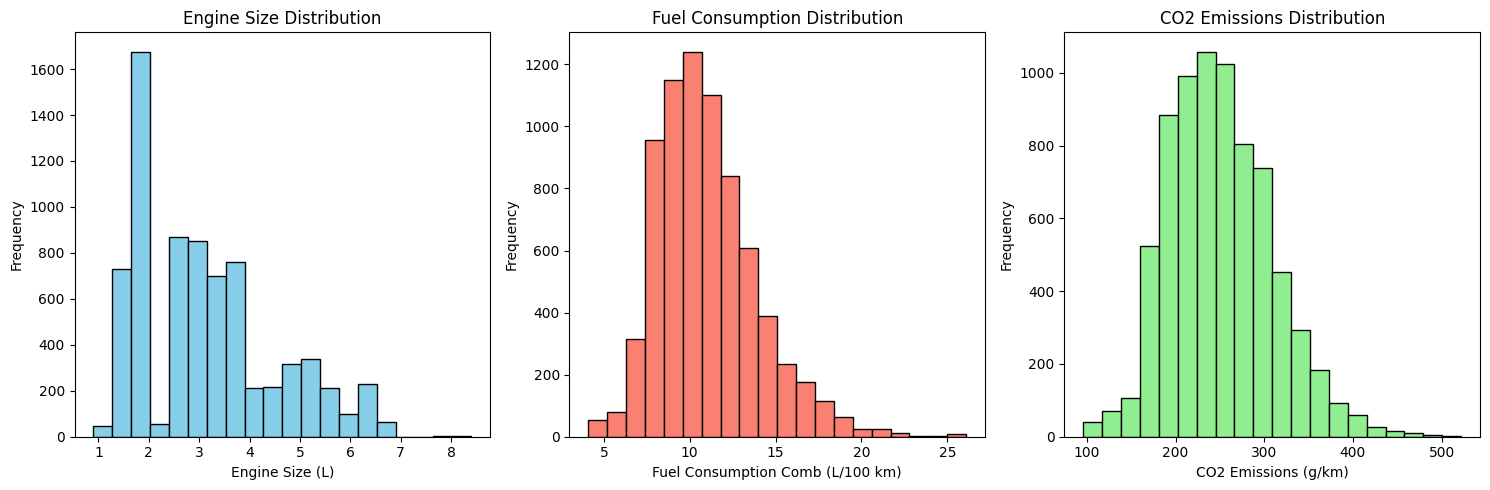

In [6]:
# Create a figure and axis object
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for Engine Size, Fuel Consumption, and CO2 Emissions
axs[0].hist(df['Engine Size(L)'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Engine Size Distribution')
axs[0].set_xlabel('Engine Size (L)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['Fuel Consumption Comb (L/100 km)'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Fuel Consumption Distribution')
axs[1].set_xlabel('Fuel Consumption Comb (L/100 km)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['CO2 Emissions(g/km)'], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title('CO2 Emissions Distribution')
axs[2].set_xlabel('CO2 Emissions (g/km)')
axs[2].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

#### Scatter plots: To explore relationships between variables such as Engine Size vs. Fuel Consumption or CO2 Emissions.

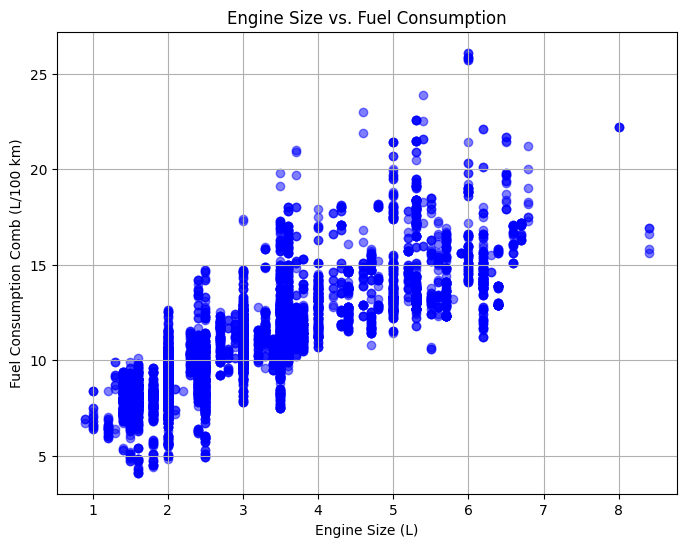

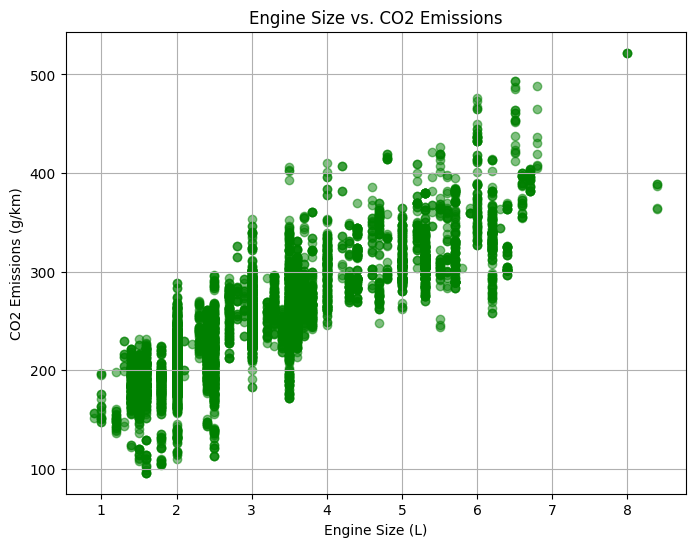

In [7]:
# Create a scatter plot for Engine Size vs. Fuel Consumption
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine Size(L)'], df['Fuel Consumption Comb (L/100 km)'], color='blue', alpha=0.5)
plt.title('Engine Size vs. Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.grid(True)
plt.show()

# Create a scatter plot for Engine Size vs. CO2 Emissions
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], color='green', alpha=0.5)
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

#### Box plots: To identify outliers and compare distributions across different vehicle classes or fuel types.

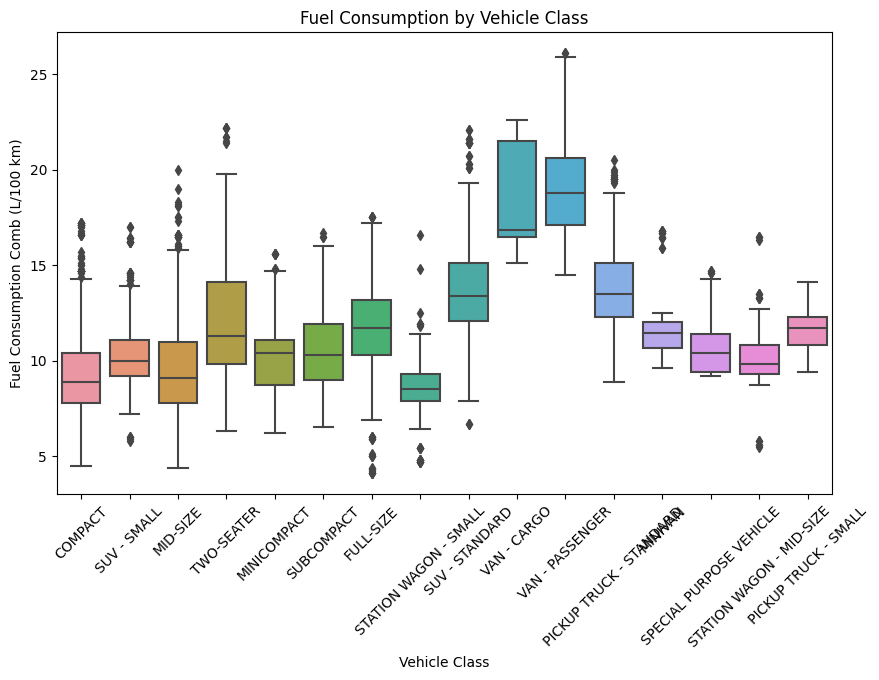

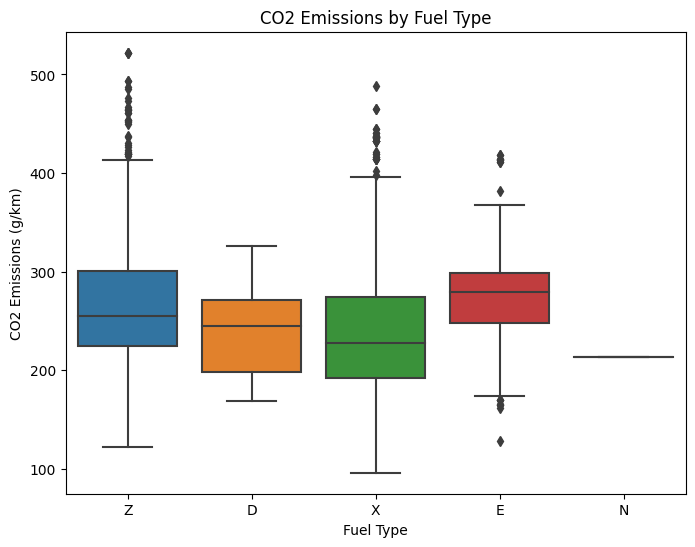

In [8]:
# Create box plot for Fuel Consumption across different vehicle classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.xticks(rotation=45)
plt.show()

# Create box plot for CO2 Emissions across different fuel types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

#### Bar plots: To compare average fuel consumption or CO2 emissions across different vehicle classes or fuel types.

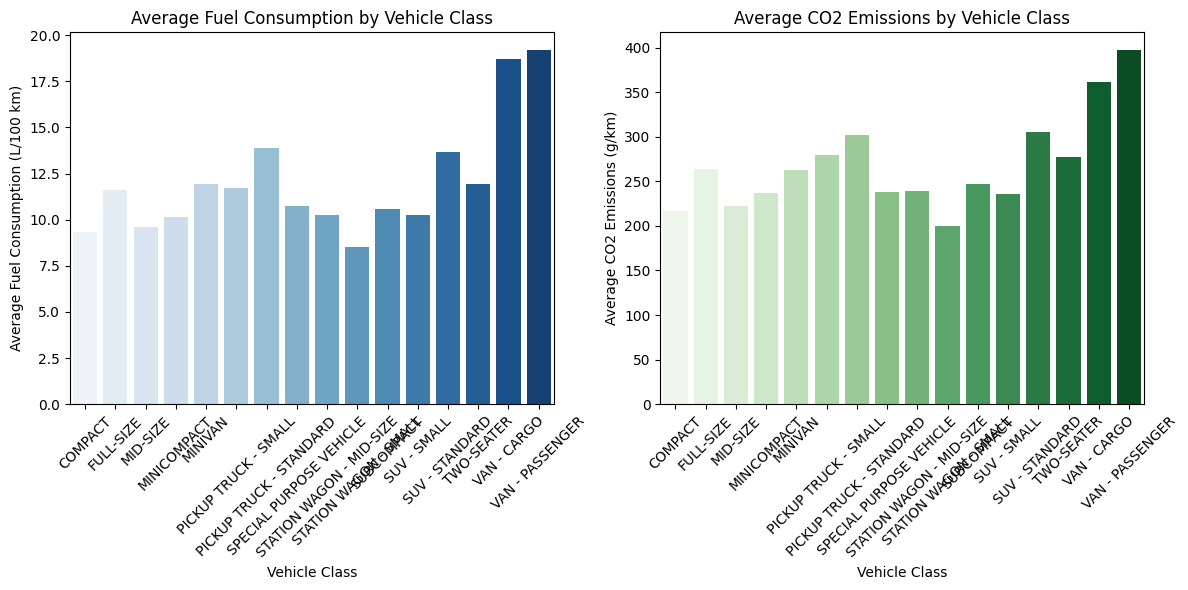

In [9]:
# Calculate average fuel consumption and CO2 emissions by vehicle class
avg_fuel_consumption_class = df.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean().reset_index()
avg_co2_emissions_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().reset_index()

# Create bar plots for average fuel consumption and CO2 emissions by vehicle class using Seaborn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=avg_fuel_consumption_class, palette='Blues')
plt.title('Average Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=avg_co2_emissions_class, palette='Greens')
plt.title('Average CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Correlation Analysis: Determine correlations between variables using correlation coefficients (e.g., Pearson correlation) to understand how variables like Engine Size, Cylinders, and Fuel Consumption relate to each other.

In [10]:
# Selecting the relevant columns for correlation analysis
correlation_cols = ['Engine Size(L)', 'Cylinders', 
                    'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']

# Calculating Pearson correlation coefficients
correlation_matrix = df[correlation_cols].corr()

# Print correlation matrix
print("Pearson correlation coefficients:")
print(correlation_matrix)

Pearson correlation coefficients:
                                  Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.927653   
Cylinders                               0.927653   1.000000   
Fuel Consumption Comb (L/100 km)        0.817060   0.780534   
CO2 Emissions(g/km)                     0.851145   0.832644   

                                  Fuel Consumption Comb (L/100 km)  \
Engine Size(L)                                            0.817060   
Cylinders                                                 0.780534   
Fuel Consumption Comb (L/100 km)                          1.000000   
CO2 Emissions(g/km)                                       0.918052   

                                  CO2 Emissions(g/km)  
Engine Size(L)                               0.851145  
Cylinders                                    0.832644  
Fuel Consumption Comb (L/100 km)             0.918052  
CO2 Emissions(g/km)                          1.000000  


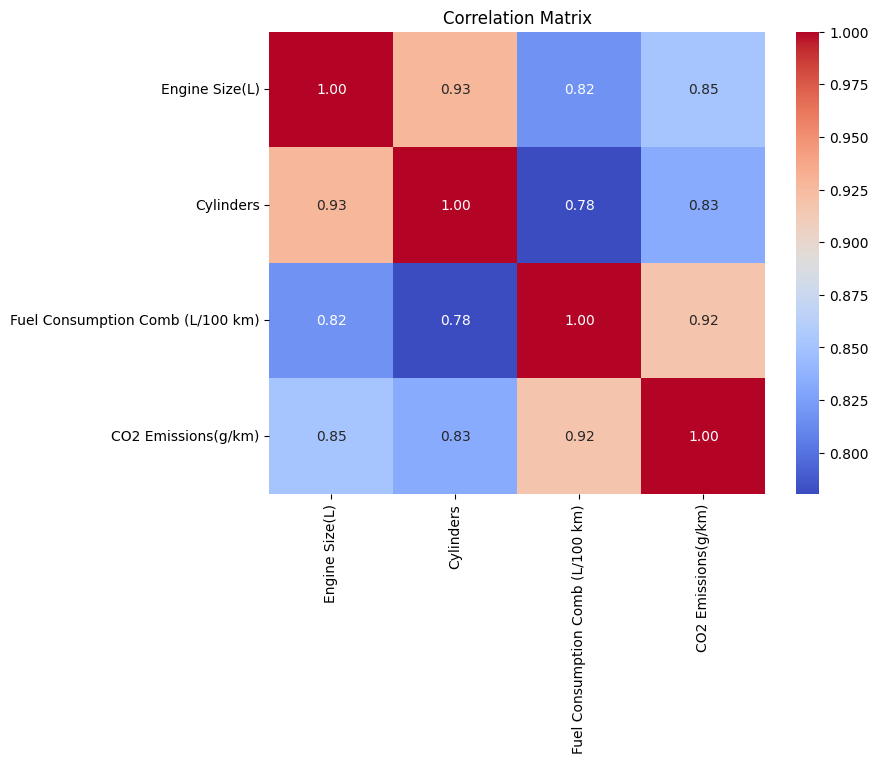

In [11]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

#### A pairplot of some Numerical valued parameter to understand the relation between each other.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

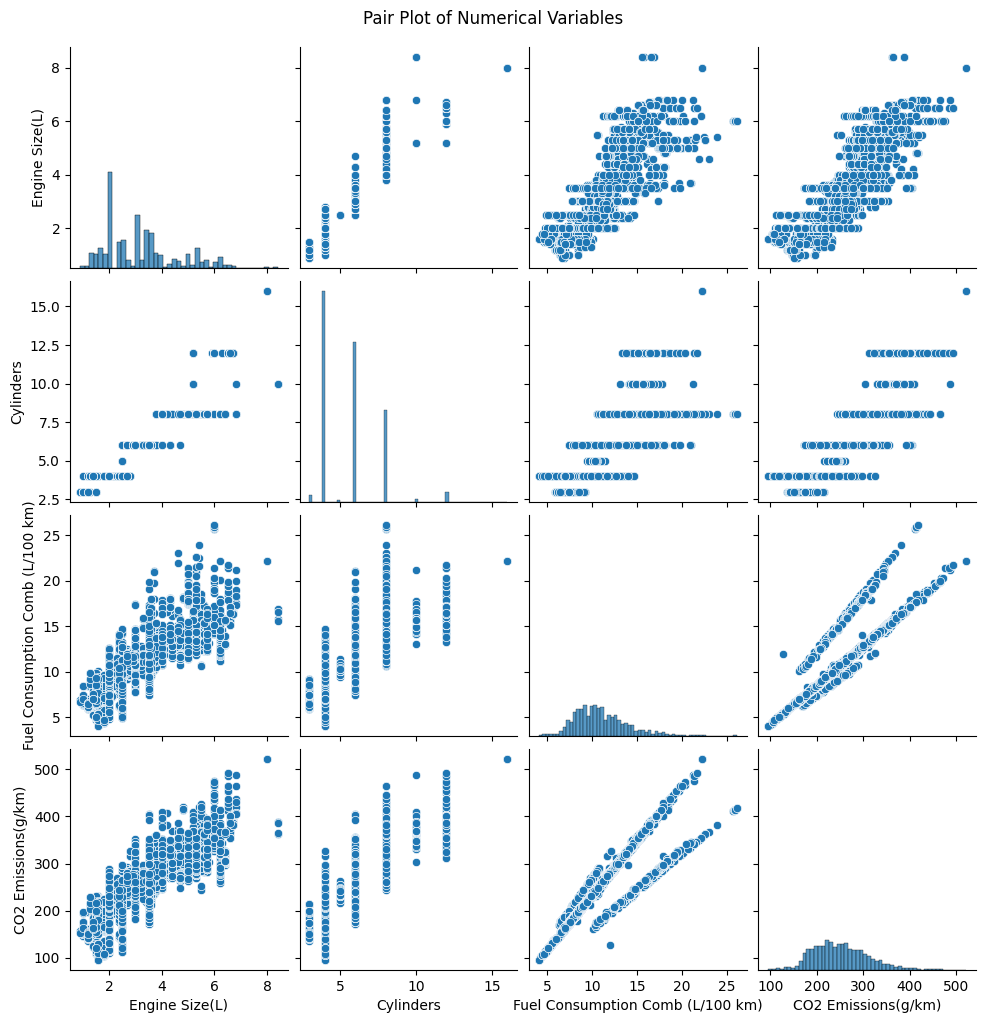

In [12]:
# Selecting numerical columns for pair plot
numerical_cols = ['Engine Size(L)', 'Cylinders', 
                  'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']

# Create pair plot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

#### Comparative Analysis:
    Compare fuel consumption and CO2 emissions between different vehicle classes or fuel types.

    Compare the performance of vehicles with different engine sizes or cylinder counts.
and comaprative visualization with bar plot, box plot and scatter plot.

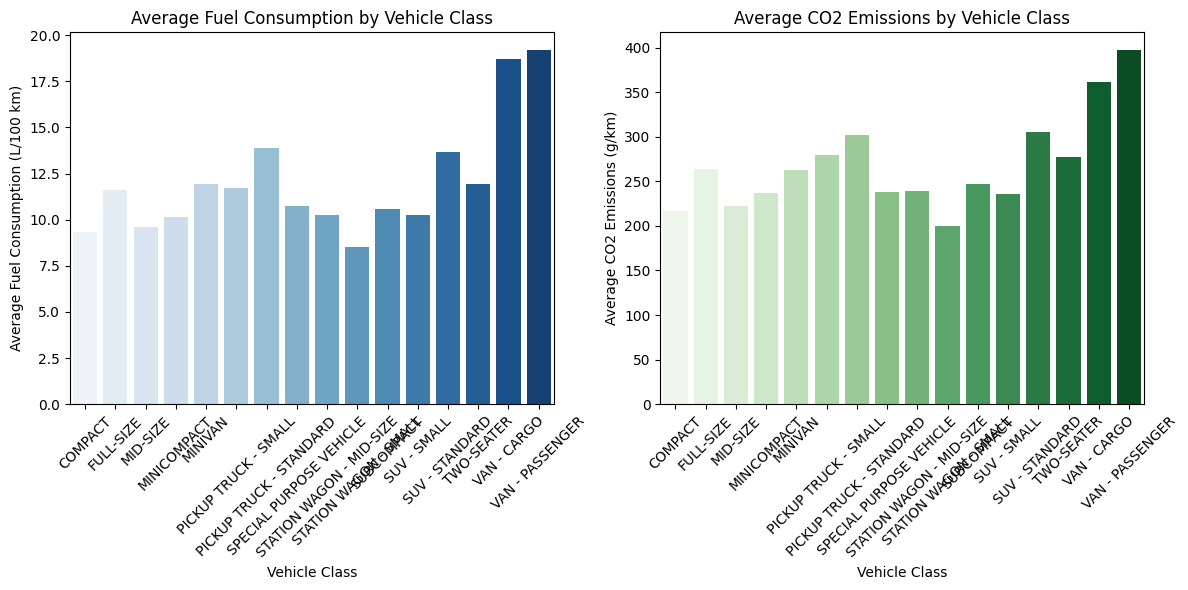

In [13]:
# Calculate average fuel consumption and CO2 emissions by vehicle class
avg_fuel_consumption_class = df.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean().reset_index()
avg_co2_emissions_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().reset_index()

# Create bar plots for average fuel consumption and CO2 emissions by vehicle class
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=avg_fuel_consumption_class, palette='Blues')
plt.title('Average Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=avg_co2_emissions_class, palette='Greens')
plt.title('Average CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


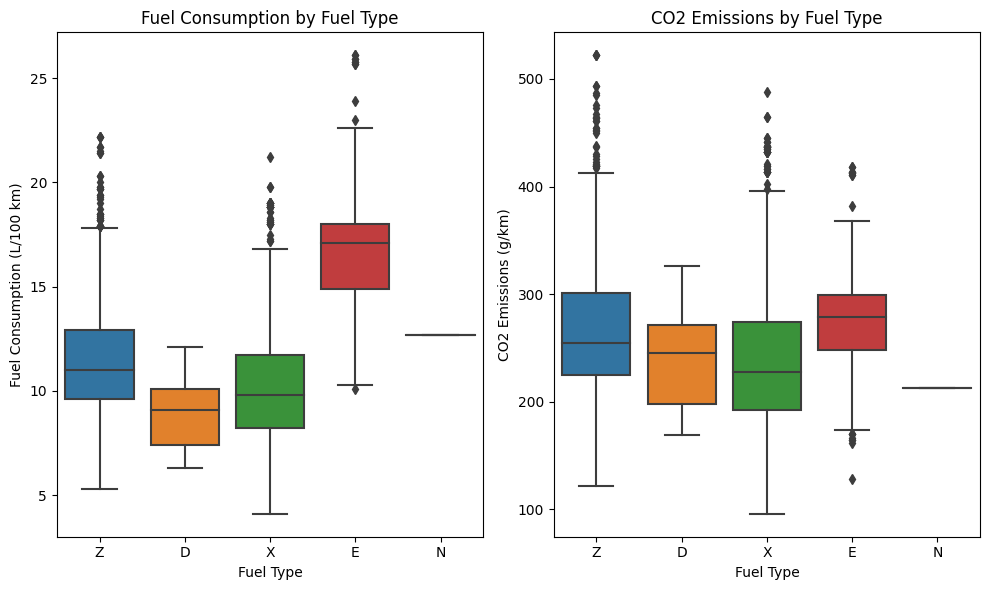

In [14]:
# Create box plots for fuel consumption and CO2 emissions by fuel type
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (L/100 km)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')

plt.tight_layout()
plt.show()

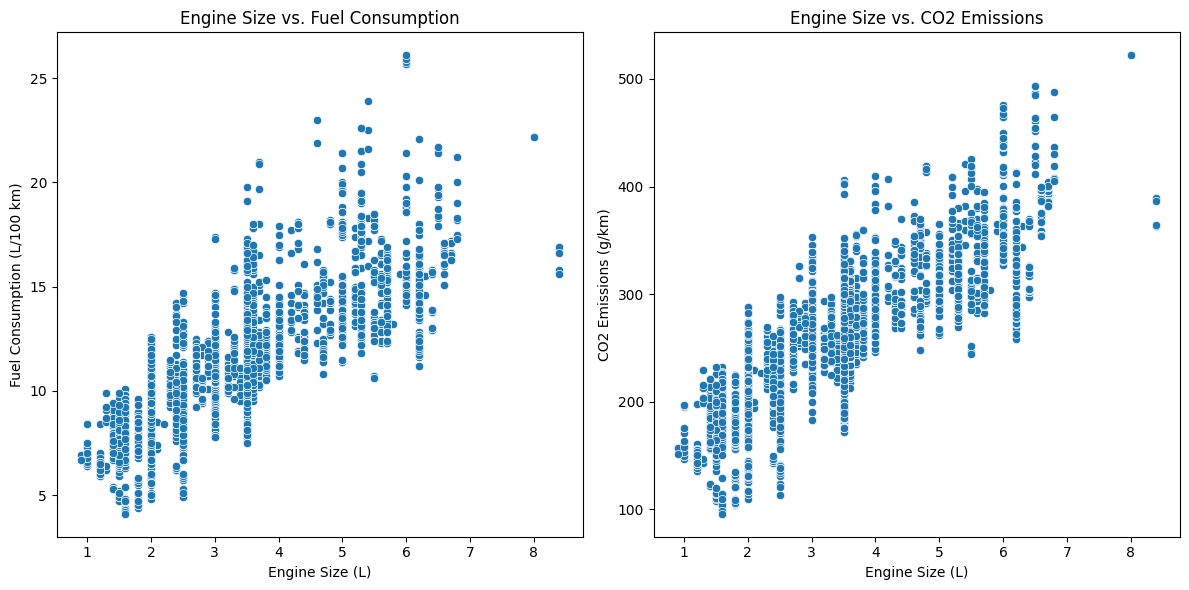

In [15]:
# Create scatter plots for Engine Size vs. Fuel Consumption and CO2 Emissions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Engine Size vs. Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')

plt.tight_layout()
plt.show()

### Predictive Modeling:
    We have built predictive models to estimate fuel consumption or CO2 emissions based on other variables like engine size, cylinder count, or transmission type.

In [16]:
# Selecting predictor variables (features) and target variable
X = df[['Engine Size(L)', 'Cylinders']]  # Features: Engine Size and Cylinder Count
y = df['Fuel Consumption Comb (L/100 km)']  # Target variable: Fuel Consumption

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2.792672389925511
R-squared Score: 0.6695767116923692


Use regression analysis to predict fuel consumption or CO2 emissions based on vehicle characteristics.

In [17]:
# Selecting predictor variables (features) and target variable
X = df[['Engine Size(L)', 'Cylinders']]  # Features: Engine Size and Cylinder Count
y = df['CO2 Emissions(g/km)']  # Target variable: CO2 Emissions

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 913.123098587668
R-squared Score: 0.7345284856349791


#### Actual vs prediction values of CO2 emission.

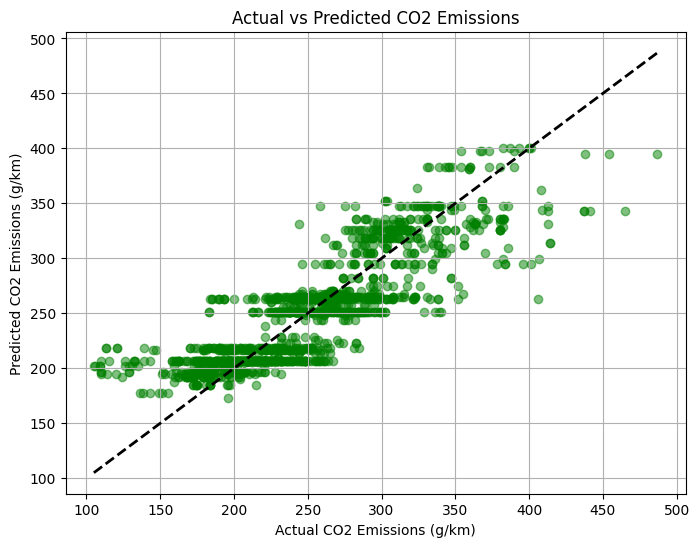

In [18]:
# Plotting actual vs predicted CO2 emissions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

#### Comparative Analysis by Vehicle Class:

Bar Plot for Average Fuel Consumption and CO2 Emissions by Vehicle Class:

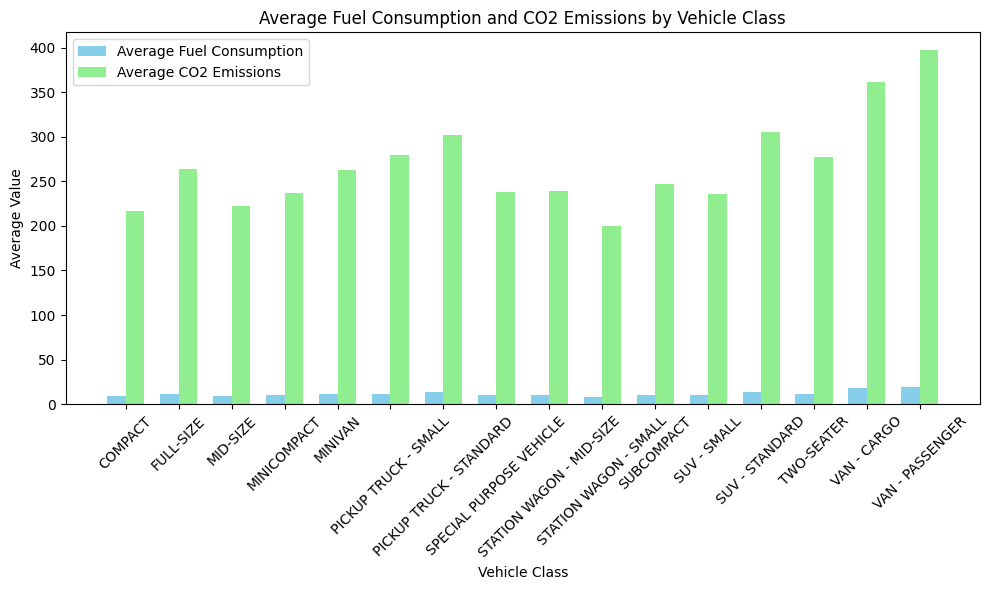

In [19]:
# Group by vehicle class and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_class = df.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()

# Get the position of each vehicle class
x = range(len(avg_fuel_consumption_class))

# Define the width of each bar
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, avg_fuel_consumption_class, width, label='Average Fuel Consumption', color='skyblue')
plt.bar([i + width for i in x], avg_co2_emissions_class, width, label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Vehicle Class')
plt.xticks([i + width/2 for i in x], avg_fuel_consumption_class.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Comparative Analysis by Fuel Type:

Box Plot for Fuel Consumption and CO2 Emissions by Fuel Type:

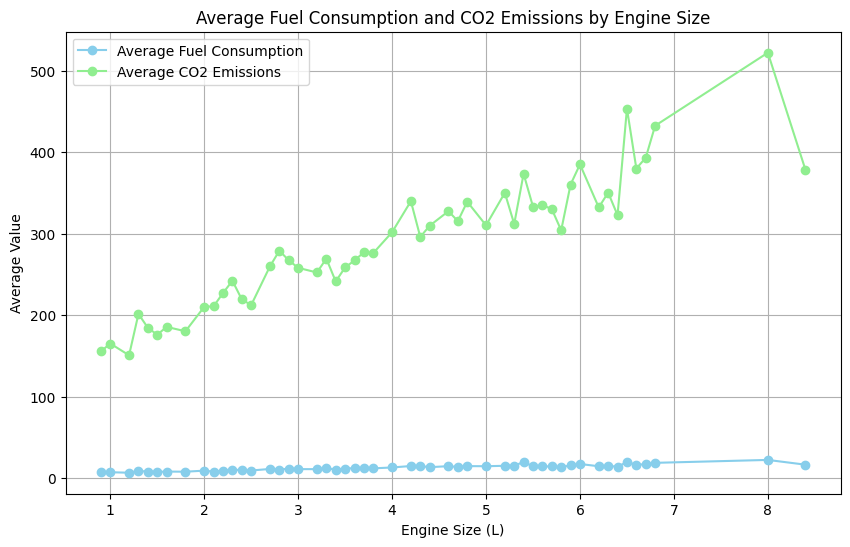

In [20]:
# Group by engine size and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_engine = df.groupby('Engine Size(L)')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_engine = df.groupby('Engine Size(L)')['CO2 Emissions(g/km)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fuel_consumption_engine.index, avg_fuel_consumption_engine, marker='o', label='Average Fuel Consumption', color='skyblue')
plt.plot(avg_co2_emissions_engine.index, avg_co2_emissions_engine, marker='o', label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Engine Size')
plt.legend()
plt.grid(True)
plt.show()


#### Comparative Analysis by Engine Size or Cylinder Counts:

Scatter Plot for Engine Size vs. Fuel Consumption and CO2 Emissions:

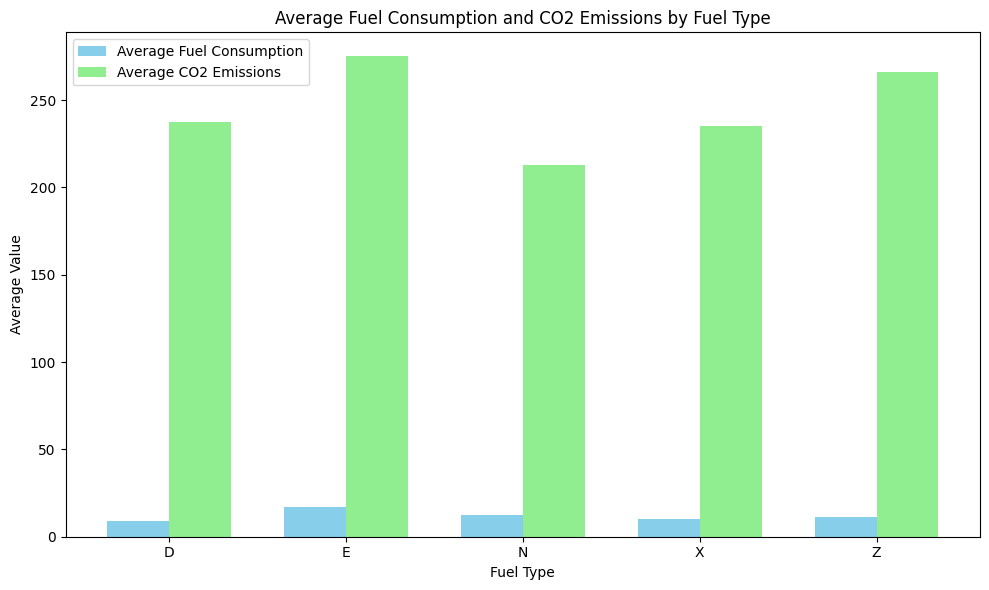

In [21]:
# Group by fuel type and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_fuel = df.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_fuel = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

# Get the position of each fuel type
x = range(len(avg_fuel_consumption_fuel))

# Define the width of each bar
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, avg_fuel_consumption_fuel, width, label='Average Fuel Consumption', color='skyblue')
plt.bar([i + width for i in x], avg_co2_emissions_fuel, width, label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Fuel Type')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Fuel Type')
plt.xticks([i + width/2 for i in x], avg_fuel_consumption_fuel.index)
plt.legend()
plt.tight_layout()
plt.show()

#### Cluster Analysis: Explore similarities and differences between vehicles by clustering them based on features like engine size, cylinders, and fuel consumption

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


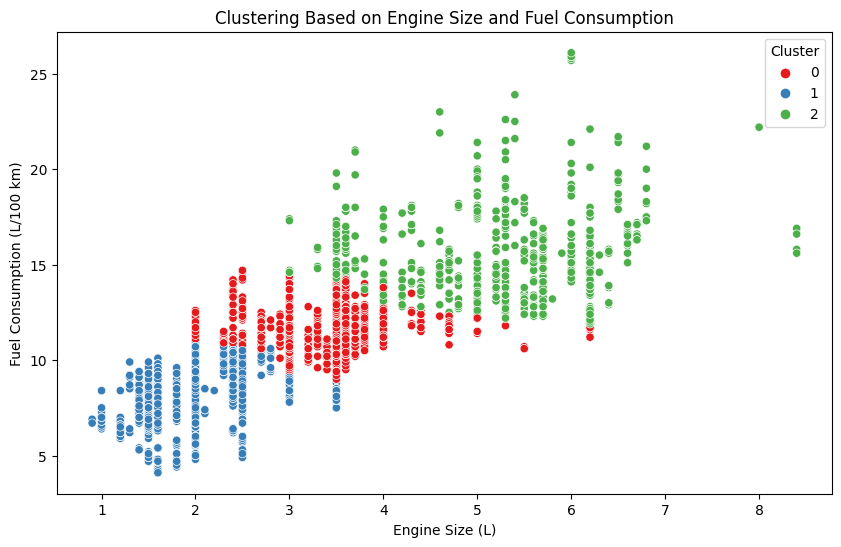

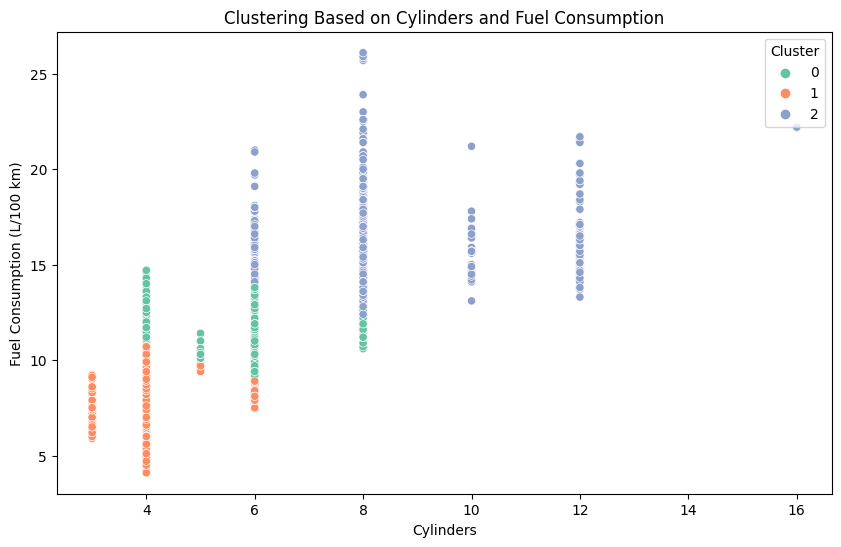

In [22]:
# Selecting features for clustering
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']

# Extracting features from the dataset
X = df[features]

# Choosing the number of clusters (you can change this value based on your requirements)
num_clusters = 3

# Initializing K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fitting K-means to the data
kmeans.fit(X)

# Assigning cluster labels to each data point
df['Cluster'] = kmeans.labels_

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)', hue='Cluster', data=df, palette='Set1')
plt.title('Clustering Based on Engine Size and Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cylinders', y='Fuel Consumption Comb (L/100 km)', hue='Cluster', data=df, palette='Set2')
plt.title('Clustering Based on Cylinders and Fuel Consumption')
plt.xlabel('Cylinders')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()

## Key Findings from this Analysis
* Data Dive: We started by examining the data closely. This helped us understand things like typical engine sizes, number of cylinders, fuel use, and emissions levels for different vehicles.
* Car Comparisons: We compared how much fuel different vehicles use and how much pollution they cause. This included looking at car types, engine sizes, and even what kind of fuel they use. We used charts to see these differences clearly.
* Prediction Power: We built models to predict fuel use and emissions based on a car's features, like engine size. Think of it like a tool that can guess how eco-friendly a car might be based on its design.
* Car Segments: We grouped vehicles with similar features together. This helped us see how fuel use and emissions differed between, for example, small sedans and large SUVs.
* Hidden Patterns: We used a special technique to find groups of cars with similar features, like engine size and fuel efficiency. This revealed hidden patterns in the data, like which car features tend to go together.

Overall Impact: This analysis helps us understand how a car's design affects how much fuel it uses and how much pollution it creates. This knowledge can be used by policymakers, car companies, and even car buyers to make choices that are better for the environment.